# Data Extraction

In [1]:
# Import required libraries
import pandas as pd

In [2]:
# Load the dataset with encoding='latin-1' to avoid UnicodeDecodeError
data = pd.read_csv('spam_messages.csv', encoding='latin-1')

In [3]:
# View the top 5 rows
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# Check the size of the dataset (number of rows, number of columns)
data.shape

(5572, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Data Cleaning

In [6]:
# Drop irrelevant columns
data = data[['v1', 'v2']]  # v1 = label, v2 = message

# Rename columns for clarity
data.columns = ['Label', 'Message']

# Check and remove null values
data.isnull().sum()
data = data.dropna()

# Remove duplicates
data = data.drop_duplicates()


In [7]:
data.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.shape

(5169, 2)

# Data Analysis

In [9]:
# Count labels
data['Label'].value_counts()

Label
ham     4516
spam     653
Name: count, dtype: int64

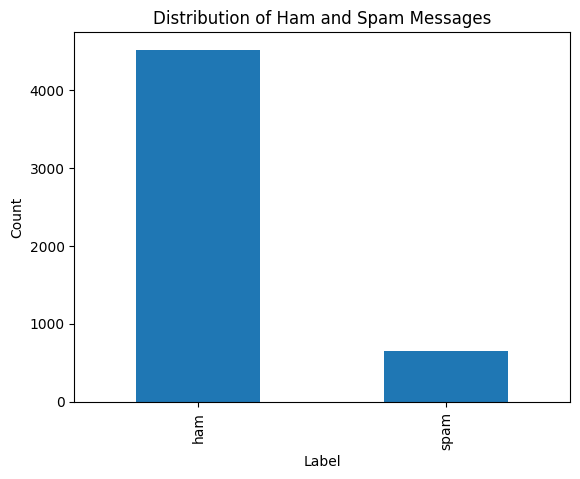

In [10]:
import matplotlib.pyplot as plt

data['Label'].value_counts().plot(kind="bar")
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Ham and Spam Messages")
plt.show()

In [11]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [12]:
import nltk

try:
    nltk.download('punkt_tab')
except:
    nltk.download('punkt')

try:
    from nltk.tokenize import sent_tokenize
    test = sent_tokenize("This is test message")
    print(f"NLTK tokenizer working: {len(test)} sentences detected")
    use_nltk = True
except Exception as e:
    print(f"NLTK failed: {e}")
    use_nltk = False

# Character count
data['num_characters'] = data['Message'].apply(len)

# Word count  
data['num_words'] = data['Message'].apply(lambda x: len(str(x).split()))

# Sentence count
if use_nltk:
    data['num_sentences'] = data['Message'].apply(lambda x: len(sent_tokenize(str(x))))
else:
    import re
    def count_sentences(text):
        # Split on sentence endings and count non-empty results
        sentences = re.split(r'[.!?]+', str(text))
        return len([s for s in sentences if s.strip()])
    
    data['num_sentences'] = data['Message'].apply(count_sentences)

print(f"New columns: {list(data.columns)}")
print("Sample of new features:")
print(data[['num_characters', 'num_words', 'num_sentences']].head(10))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


NLTK tokenizer working: 1 sentences detected
New columns: ['Label', 'Message', 'num_characters', 'num_words', 'num_sentences']
Sample of new features:
   num_characters  num_words  num_sentences
0             111         20              2
1              29          6              2
2             155         28              2
3              49         11              1
4              61         13              1
5             148         32              4
6              77         16              2
7             160         26              2
8             158         26              5
9             154         29              3


In [13]:
data.head()

,Label,Message,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,2
1,ham,Ok lar... Joking wif u oni...,29,6,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,ham,U dun say so early hor... U c already then say...,49,11,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [14]:
length_stats = data.groupby('Label')[['num_characters', 'num_words']].describe()
length_stats

num_characters                                                           \
               count        mean        std   min    25%    50%    75%    max   
Label                                                                           
ham           4516.0   70.459256  56.358207   2.0   34.0   52.0   90.0  910.0   
spam           653.0  137.891271  30.137753  13.0  132.0  149.0  157.0  224.0   

      num_words                                                      
          count       mean        std  min   25%   50%   75%    max  
Label                                                                
ham      4516.0  14.134632  11.116240  1.0   7.0  11.0  18.0  171.0  
spam      653.0  23.681470   5.967672  2.0  22.0  25.0  28.0   35.0

# Text Preprocessing

In [15]:
import string

# Download with force=True to ensure fresh downloads
downloads = [
    ('stopwords', 'Stopwords corpus'),
    ('punkt', 'Punkt tokenizer'),
    ('punkt_tab', 'Punkt tokenizer (new version)'),
]

for package, description in downloads:
    try:
        nltk.download(package, force=True)
    except Exception as e:
        print(f"Failed to download {package}: {e}")

# Now import the required modules
try:
    from nltk.corpus import stopwords
    from nltk.stem.porter import PorterStemmer
    from nltk.tokenize import word_tokenize
    
    # Test that stopwords work
    english_stopwords = stopwords.words('english')

except Exception as e:
    print(f"Import failed: {e}")
    raise

# Initialize the stemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()                            # convert to lowercase
    text = nltk.word_tokenize(text)                # Split the text  into words
    text = [word for word in text if word.isalnum()]  # Remove special characters
    text = [word for word in text if word not in english_stopwords and word not in string.punctuation]  # Remove stopwords and punctuation
    text = [ps.stem(word) for word in text]        # Apply Stemming
    return " ".join(text)         

data['transformed_message'] = data['Message'].apply(transform_text)

# Check dataset
print(f"\nDataset shape: {data.shape}")
print(f"Columns: {list(data.columns)}")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



Dataset shape: (5169, 6)
Columns: ['Label', 'Message', 'num_characters', 'num_words', 'num_sentences', 'transformed_message']


In [16]:
data.head()

,Label,Message,num_characters,num_words,num_sentences,transformed_message
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,11,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe usf live around though


In [17]:
# Import two text vectorization tools from scikit-learn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Count Vectorizer: Simple bag-of-words approach
cv = CountVectorizer()

# fit_transform() builds a vocabulary of all words in the corpus and transforms each message into a numeric array based on word counts
X_bow = cv.fit_transform(data['transformed_message']).toarray()


# Create a TfidfVectorizer instance (Better for weighting important words) with max_features=3000 to limit the number of unique words to 3000
tfidf = TfidfVectorizer(max_features=3000)

# Apply TF-IDF on the same preprocessed text to give higher weight to important, rare words and lower weight to frequent ones
X = tfidf.fit_transform(data['transformed_message']).toarray()


# Best Model Selection

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Prepare and define models to compare
models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

# Prepare labels
y = data['Label'].map({'ham': 0, 'spam': 1}).values

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# List to store comparison results
comparison_results = []

In [19]:
# Looping for each model
for name, clf in models.items():
    clf.fit(X_train, y_train)                   # Train the model on the training data
    y_pred = clf.predict(X_test)                # Predict labels for the testing set
    acc = accuracy_score(y_test, y_pred)        # Calculate accuracy (correct predictions)
    precision = precision_score(y_test, y_pred) # Calculate precision (percentage of correctly predicted spam)
    recall = recall_score(y_test, y_pred)       # Calculate recall (correctly identified actual spam messages)
    f1 = f1_score(y_test, y_pred)               # Calculate F1-score (harmonic mean of precision and recall)

    # Add all model and its performance metrics to the dictionary
    comparison_results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    })


In [20]:
# Convert to DataFrame for a table
results_df = pd.DataFrame(comparison_results).sort_values(by="Accuracy", ascending=False)
print(results_df)

# Identify best model
best_model_name = results_df.iloc[0]["Model"]
print("\nBest Model:", best_model_name)

                     Model  Accuracy  Precision    Recall  F1-score
2               Linear SVM  0.981625   0.977273  0.889655  0.931408
3            Random Forest  0.975822   0.991803  0.834483  0.906367
0  Multinomial Naive Bayes  0.972921   0.991597  0.813793  0.893939
1      Logistic Regression  0.958414   0.947368  0.744828  0.833977
4            Decision Tree  0.942940   0.798611  0.793103  0.795848
5                      KNN  0.907157   1.000000  0.337931  0.505155

Best Model: Linear SVM


In [21]:
best_model_name = None
best_f1 = -1
best_model = None

# Loop to train, predict, and evaluate
for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1_spam = f1_score(y_test, y_pred, pos_label=1)     # F1-score for spam class (1)
    print(f"{name} F1-Score (Spam): {f1_spam:.4f}")

    if f1_spam > best_f1:
        best_f1 = f1_spam
        best_model_name = name
        best_model = clf

print(f"\nBest model (F1-Score): {best_model_name}")

Multinomial Naive Bayes F1-Score (Spam): 0.8939
Logistic Regression F1-Score (Spam): 0.8340
Linear SVM F1-Score (Spam): 0.9314
Random Forest F1-Score (Spam): 0.9064
Decision Tree F1-Score (Spam): 0.7958
KNN F1-Score (Spam): 0.5052

Best model (F1-Score): Linear SVM


In [22]:
# 1. New messages (Not the one from dataset)
new_messages = [
    "Congratulations! You have won a free iPhone. Click here to claim now.",
    "Hey, are we still meeting for lunch today?",
    "Urgent! Your account has been suspended. Verify now to avoid penalties.",
    "Don't forget to submit the assignment by 5 PM today.",
    "Win a $500 gift card by clicking this link!"
]

# 2. True labels for the new messages (0 = Ham, 1 = Spam)
true_labels = [1, 0, 1, 0, 1]  # manually labeled

# 3. Preprocess messages
new_messages_transformed = [transform_text(msg) for msg in new_messages]

# 4. Vectorize using trained TF-IDF
new_messages_vector = tfidf.transform(new_messages_transformed).toarray()

# 5. Predict with all models and evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for name, clf in models.items():
    pred_labels = clf.predict(new_messages_vector)

    # Convert numeric predictions to readable labels
    pred_labels_text = ["Spam" if x == 1 else "Ham" for x in pred_labels]

    # Calculate metrics
    acc = accuracy_score(true_labels, pred_labels)
    precision = precision_score(true_labels, pred_labels)
    recall = recall_score(true_labels, pred_labels)
    f1 = f1_score(true_labels, pred_labels)

    print(f"\n{name} Predictions: {pred_labels_text}")
    print(f"{name} Metrics: Accuracy = {acc:.2f}, Precision = {precision:.2f}, Recall = {recall:.2f}, F1 = {f1:.2f}")



Multinomial Naive Bayes Predictions: ['Spam', 'Ham', 'Ham', 'Ham', 'Spam']
Multinomial Naive Bayes Metrics: Accuracy = 0.80, Precision = 1.00, Recall = 0.67, F1 = 0.80

Logistic Regression Predictions: ['Spam', 'Ham', 'Ham', 'Ham', 'Ham']
Logistic Regression Metrics: Accuracy = 0.60, Precision = 1.00, Recall = 0.33, F1 = 0.50

Linear SVM Predictions: ['Spam', 'Ham', 'Ham', 'Ham', 'Spam']
Linear SVM Metrics: Accuracy = 0.80, Precision = 1.00, Recall = 0.67, F1 = 0.80

Random Forest Predictions: ['Ham', 'Ham', 'Ham', 'Ham', 'Ham']
Random Forest Metrics: Accuracy = 0.40, Precision = 0.00, Recall = 0.00, F1 = 0.00

Decision Tree Predictions: ['Spam', 'Ham', 'Ham', 'Ham', 'Ham']
Decision Tree Metrics: Accuracy = 0.60, Precision = 1.00, Recall = 0.33, F1 = 0.50

KNN Predictions: ['Ham', 'Ham', 'Ham', 'Ham', 'Ham']
KNN Metrics: Accuracy = 0.40, Precision = 0.00, Recall = 0.00, F1 = 0.00


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


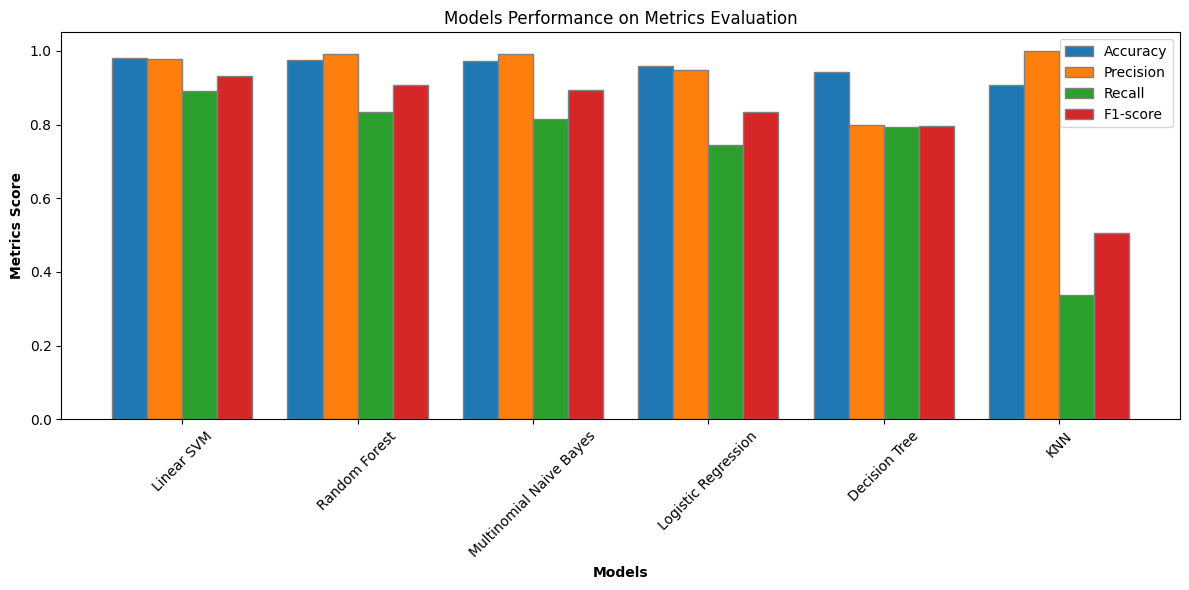

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Set metrics and models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
models_list = results_df['Model'].values

# Bar width and positions
bar_width = 0.2
r1 = np.arange(len(models_list))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width*2 for x in r1]
r4 = [x + bar_width*3 for x in r1]

# Plot bars
plt.figure(figsize=(12,6))
plt.bar(r1, results_df['Accuracy'], width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, results_df['Precision'], width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, results_df['Recall'], width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, results_df['F1-score'], width=bar_width, edgecolor='grey', label='F1-score')

# Labels and title
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Metrics Score', fontweight='bold')
plt.xticks([r + bar_width*1.5 for r in range(len(models_list))], models_list, rotation=45)
plt.title('Models Performance on Metrics Evaluation')
plt.ylim(0,1.05)
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
# Train a baseline Linear SVM
base_svm = LinearSVC(random_state=42, max_iter=1000)  # default params
base_svm.fit(X_train, y_train)

# Evaluate the model performance
base_pred = base_svm.predict(X_test)
base_f1 = f1_score(y_test, base_pred, zero_division=0)
base_accuracy = accuracy_score(y_test, base_pred)
base_precision = precision_score(y_test, base_pred, zero_division=0)
base_recall = recall_score(y_test, base_pred, zero_division=0)

# Print the baseline model performance
print(f"Base SVM Performance:")
print(f"Accuracy: {base_accuracy:.4f}")
print(f"Precision: {base_precision:.4f}")
print(f"Recall: {base_recall:.4f}")
print(f"F1-Score: {base_f1:.4f}")

Base SVM Performance:
Accuracy: 0.9816
Precision: 0.9773
Recall: 0.8897
F1-Score: 0.9314


In [25]:

from sklearn.model_selection import GridSearchCV
import numpy as np

# Research-based parameter grid for SMS spam classification
param_grid = {
    'C': [0.1, 1, 10, 100],
    'loss': ['squared_hinge'],
    'class_weight': [None, 'balanced'],
    'max_iter': [1000, 2000],
    'dual': [False]
}

# Total combinations from the grid
print(f"Total parameter combinations: {np.prod([len(v) for v in param_grid.values()])}")

# Use LinearSVC directly
base_svm_model = LinearSVC(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(
    base_svm_model,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    error_score='raise'
)

# Fit the grid search to train model for all combinations and find the best model
grid_search.fit(X_train, y_train)

Total parameter combinations: 16
Fitting 5 folds for each of 16 candidates, totalling 80 fits


/home/codespace/.local/lib/python3.12/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,estimator,LinearSVC(random_state=42)
,param_grid,"{'C': [0.1, 1, ...], 'class_weight': [None, 'balanced'], 'dual': [False], 'loss': ['squared_hinge'], ...}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,'raise'
,return_train_score,False
,penalty,'l2'


In [26]:
print(f"\nBest Performing F1-Score: {grid_search.best_score_:.4f}")
print("Best Parameters:", grid_search.best_params_)


Best Performing F1-Score: 0.9114
Best Parameters: {'C': 1, 'class_weight': 'balanced', 'dual': False, 'loss': 'squared_hinge', 'max_iter': 1000}


In [27]:
optimized_model = grid_search.best_estimator_

y_pred = optimized_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label=1)
rec = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

results_df = pd.DataFrame([["Optimized SVM", acc, prec, rec, f1]],
                          columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Optimized SVM,0.975822,0.910959,0.917241,0.914089


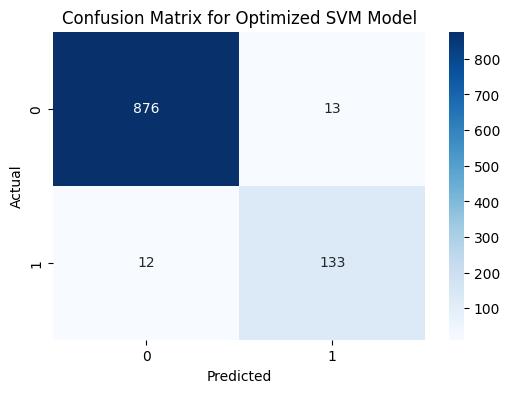

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       889
        spam       0.91      0.92      0.91       145

    accuracy                           0.98      1034
   macro avg       0.95      0.95      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [28]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# پیش‌بینی
y_pred = optimized_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Optimized SVM Model")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=["ham", "spam"]))

In [29]:
# Metrics Comparison between baseline and optimized model
print(f"\nPERFORMANCE COMPARISON TABLE:")
print(f"{'Metric':<12} {'Baseline':<10} {'Optimized':<10} {'Difference':<12}")
print(f"{'Accuracy':<12} {base_accuracy:<10.4f} {acc:<10.4f} {acc - base_accuracy:<+11.4f}")
print(f"{'Precision':<12} {base_precision:<10.4f} {prec:<10.4f} {prec - base_precision:<+11.4f}")
print(f"{'Recall':<12} {base_recall:<10.4f} {rec:<10.4f} {rec - base_recall:<+11.4f}")
print(f"{'F1-Score':<12} {base_f1:<10.4f} {f1:<10.4f} {f1 - base_f1:<+11.4f}")


PERFORMANCE COMPARISON TABLE:
Metric       Baseline   Optimized  Difference  
Accuracy     0.9816     0.9758     -0.0058    
Precision    0.9773     0.9110     -0.0663    
Recall       0.8897     0.9172     +0.0276    
F1-Score     0.9314     0.9141     -0.0173    


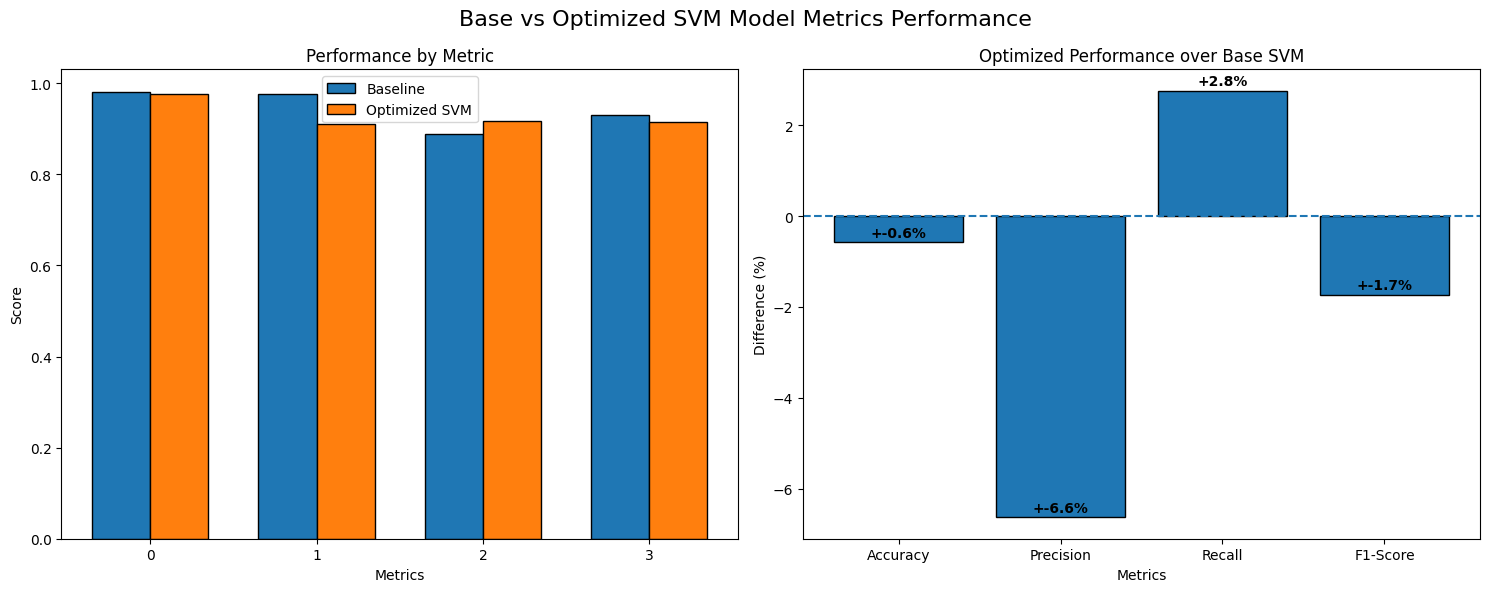

In [30]:
# Plot for Baseline vs Optimized Models Metrics Comparison
import matplotlib.pyplot as plt

# Prepare data for plotting - ONLY baseline vs optimized
models = ['Baseline\n(Most Frequent)', 'Optimized Linear SVM\n(Grid Search)']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Performance data - ONLY two models
baseline_scores = [base_accuracy, base_precision, base_recall, base_f1]
optimized_scores = [acc, prec, rec, f1]

# Create comparison plots - 2 plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Base vs Optimized SVM Model Metrics Performance', fontsize=16)

# Plot 1: Metrics Comparison (Grouped Bar Chart)
x = range(len(metrics))
width = 0.35

ax1.bar([i - width/2 for i in x], baseline_scores, width, label='Baseline', edgecolor='black')
ax1.bar([i + width/2 for i in x], optimized_scores, width, label='Optimized SVM', edgecolor='black')

ax1.set_title('Performance by Metric')
ax1.set_xlabel('Metrics')
ax1.set_ylabel('Score')
ax1.set_xticks(x)
ax1.legend()

# Plot 2: Models Metrics Difference (Bar Plot)
metrics_difference = [(optimized_scores[i] - baseline_scores[i]) * 100 for i in range(4)]

bars = ax2.bar(metrics, metrics_difference, edgecolor='black')
ax2.set_title('Optimized Performance over Base SVM')
ax2.set_xlabel('Metrics')
ax2.set_ylabel('Difference (%)')
ax2.axhline(y=0, linestyle='--')

# Add metrics difference values on bars
for i, v in enumerate(metrics_difference):
    ax2.text(i, v + (max(metrics_difference) * 0.02), f'+{v:.1f}%',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [31]:
# Best parameters calculated from the grid search
best_params = grid_search.best_params_

# Train the model with the best parameters
final_model = LinearSVC(
    C=best_params['C'],
    loss=best_params['loss'],
    class_weight=best_params['class_weight'],
    max_iter=best_params['max_iter'],
    dual=best_params['dual'],
    random_state=42
)

# Train the model on the entire dataset
final_model.fit(X, y)

,penalty,'l2'
,loss,'squared_hinge'
,dual,False
,tol,0.0001
,C,1
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,verbose,0
,random_state,42


In [32]:
def check_spam(message):
    '''Function to check the entered message for spam'''
    # If entered value is string, converting to list
    is_string = False
    if isinstance(message, str):
        message = [message]
        is_string = True

    # Preprocess messages
    transformed_message = [transform_text(msg) for msg in new_messages]

    # Vectorize using trained TF-IDF
    new_messages_vector = tfidf.transform(transformed_message).toarray()

    # Prediction with the final model
    pred = final_model.predict(new_messages_vector)
    labels = ["Spam" if p == 1 else "Ham" for p in pred]

    return labels[0] if is_string else labels

In [35]:
# A message to check for spam
message = "Win a $500 gift card by clicking this link!"
print(message)
print(check_spam(message)) 

# List of messages to check for spam
new_messages = [
    "You have won a gift. Click here to claim now.",
    "Is the meeting assigned for today?",
    "Urgent! Your account has been suspended. Verify now to avoid penalties.",
    "Complete your work by the end of the day.",
    "Win a $500 gift card by opening this file. Don't miss the chance",
    "Your help is needed. Help the poor by donating to charity. Click on the link!"
]

print()
print('\n'.join(new_messages))
print(check_spam(new_messages))

Win a $500 gift card by clicking this link!
Spam

You have won a gift. Click here to claim now.
Is the meeting assigned for today?
Urgent! Your account has been suspended. Verify now to avoid penalties.
Complete your work by the end of the day.
Win a $500 gift card by opening this file. Don't miss the chance
Your help is needed. Help the poor by donating to charity. Click on the link!
['Spam', 'Ham', 'Ham', 'Ham', 'Ham', 'Spam']
